## Objective: 
To determine whether or not one is going to have Hypotheroid
  

## Metrics of Success:
To get a model performance of over 90% from each model


## Experimental Design:
Clean Data 
Exploratory Data Analysis
Analysis(Random Forest,SVC)


## Loading data

In [0]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
## Load data

data = pd.read_csv('/content/hypothyroid.csv')

## Preview data

data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


## Data Cleaning

In [211]:
## Checking the size of data
data.shape

(3163, 26)

The data has 3126 rows and 26 columns

In [168]:
## Checking data types

data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

#### Null values

In [0]:
## Replacing ? to NaN values from  
for i in range(1,26):
  data.iloc[:, i].replace('?', np.NaN, inplace=True)

all null values have been changed from ? to NaN

In [213]:
## Checking for null values and summing them if any
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

##### Frequency table 

Frequency table showing the sum of unique values from the measured values(TSH,T3,TT4,T4U,FTI,TBG)

In [171]:
data.TSH_measured.value_counts()

y    2695
n     468
Name: TSH_measured, dtype: int64

In [172]:
data.T3_measured.value_counts()

y    2468
n     695
Name: T3_measured, dtype: int64

In [173]:
data.TT4_measured.value_counts()

y    2914
n     249
Name: TT4_measured, dtype: int64

In [174]:
data.T4U_measured.value_counts()

y    2915
n     248
Name: T4U_measured, dtype: int64

In [175]:
data.FTI_measured.value_counts()

y    2916
n     247
Name: FTI_measured, dtype: int64

In [176]:
data.TBG_measured.value_counts()

n    2903
y     260
Name: TBG_measured, dtype: int64

The frequency table shows that the number of unmeasured values is directly propotional to the number of null values. This implies the missing values are not errors made and are useful.
 I therefore cannot drop these null values

In [0]:
# Creating a list of numerical columns

numeric=['age', 'FTI', 'T3', 'T4U', 'TSH', 'TT4','TBG']
for i in data.columns:
 if i in numeric:
     data[i]=pd.to_numeric(data[i])
 else:
      data[i]=data[i].astype('category')


the data types of the mentioned features have been changed from object to categorical

In [0]:
#filling in the null values with the respective means
data=data.fillna(data.mean())

In [216]:
data.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
TBG                           0
dtype: int64

All null values in in the numerical columns have been filled with the median of the respective group

#### Encoding data

In [0]:
## Create a dictionary to find and replace values

dic_to_replace = {"sex": {"M": 1, "F": 0},
               'on_thyroxine': {"t": 1, "f": 0},
                "query_on_thyroxine": {"t": 1, "f": 0},
                 "on_antithyroid_medication": {"t": 1, "f": 0},
                 "thyroid_surgery": {"t": 1, "f": 0},
                 "query_hypothyroid": {"t": 1, "f": 0},
                "query_hyperthyroid": {"t": 1, "f": 0},
                 "pregnant": {"t": 1, "f": 0},
                 "sick" : {"t": 1, "f": 0},
                 "tumor": {"t": 1, "f": 0},
                 "lithium": {"t": 1, "f": 0},
                 "goitre": {"t": 1, "f": 0},
                  "TSH_measured": {"y": 1, "n": 0},
                  "T3_measured": {"y": 1, "n": 0},
                   "TT4_measured": {"y": 1, "n": 0},
                   "T4U_measured": {"y": 1, "n": 0},
                   "FTI_measured": {"y": 1, "n": 0},
                   "TBG_measured": {"y": 1, "n": 0},
                 }
data.replace(dic_to_replace, inplace=True)

Here, values in each column has been replaced with 0 or 1 (Nominal values)

In [182]:
## Checking the dataset
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,31.283077
1,hypothyroid,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,31.283077
2,hypothyroid,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,31.283077
3,hypothyroid,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,31.283077
4,hypothyroid,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,31.283077


All the categorical has been converted to numerical

In [0]:
data = data.dropna()


In [219]:
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

Null values in the sex column has been dropped

## Descision Trees

#### Random Forest

In [0]:
## Loading Necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [0]:
## Group data into X and Y
test_features = data.drop(['status'], axis = 1)
X = test_features
y = data['status']

In [0]:
## Split Data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [223]:
## Creating a Random Forest Classifier
forest = RandomForestClassifier(n_estimators = 100, random_state = 40, min_samples_split = 20, max_depth = 5)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [0]:
## Making Predictions

y_pred = forest.predict(X_test)


In [225]:
## Checking Accuracy

from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
acc



0.9883570504527813

In [226]:
confusion = confusion_matrix(y_test, y_pred_gradient)
print(confusion)

[[ 31   3]
 [  4 735]]


The model misclassified a total of 7 patients with 3 being a false positive in having hypothyroid and 4 being a false negative in relation to hypothyroid

### Conclusion
Random forest has an accuracy level of 98.8%. This shows the model to be a good predictor of hypothyroid classification

##### Diagram of random forest

###### Optimization of Random Forest

In [227]:
## Importances
importances = list(tree.feature_importances_)

## Connecting each feature to its Importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
feature_importances = sorted(feature_importances, key = lambda X: X[1], reverse = True)

## Printing Feature importance
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: FTI                  Importance: 0.93
Variable: TSH_measured         Importance: 0.04
Variable: query_on_thyroxine   Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: TBG                  Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH                  Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measured         Importance: 0.0
Variable: TT4                  Importance: 0.0
Va

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Feature Importance')

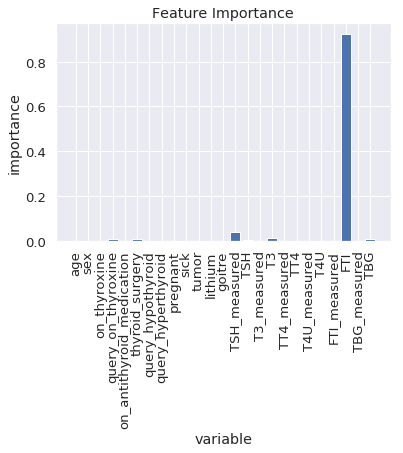

In [203]:
## Potting Feature Importance

X_values = list(range(len(importances))) #location of x values in the data

plt.bar(X_values,importances,orientation = 'vertical') # Making a bar chart
plt.xticks(X_values,test_features,rotation = 'vertical') 
plt.ylabel('importance');plt.xlabel('variable'); #labeling x axis and y axis
plt.title('Feature Importance')

In [207]:
X.shape

(3090, 25)

In [205]:
## Creating a Random Forest Classifier
forest = RandomForestClassifier(n_estimators = 100, random_state = 40, min_samples_split = 20, max_depth = 5)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [0]:

params = {'max_depth': np.linspace(1, 32, 32, endpoint=True),
         'min_samples_split' : np.linspace(0.1, 1.0, 10, 20 endpoint=True),
         'n_estimators,' : np.linspace(100, 200, 300, endpoint=True),
         'max_features' : list(range(1,data.shape[1]))}
forest = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(estimator = forest,
                     param_distributions = params,
                     scoring = 'accuracy',
                     n_jobs = 1,
                     cv = 10 )
search.fit(X,y)
search.best_params_

In [0]:

# params = { 'learning_rate':  [1, 0.5, 0.25, 0.1, 0.05, 0.01],
#          'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
#          'max_depth': np.linspace(1, 32, 32, endpoint=True),
#          'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
#          'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
#          'max_features' : list(range(1,data.shape[1]))}
# gbc = GradientBoostingClassifier()
# from sklearn.model_selection import RandomizedSearchCV
# search = RandomizedSearchCV(estimator = gbc,
#                      param_distributions = params,
#                      scoring = 'accuracy',
#                      n_jobs = 1,
#                      cv = 10 )
# search.fit(X,y)
# search.best_params_

#### Gradient Boosting

In [0]:
## Loading necessary dataset

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
## Split Data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [230]:
gradient = GradientBoostingClassifier(max_depth = 2,n_estimators = 300,learning_rate = 0.1)
gradient.fit(X_train,y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
## Predicting
y_pred_gradient = gradient.predict(X_test)


In [0]:
## 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [233]:
acc=accuracy_score(y_test, y_pred_gradient)
acc

0.9909443725743855

In [234]:
confusion_matrix(y_test, y_pred_gradient)

array([[ 31,   3],
       [  4, 735]])

In [235]:
cs = classification_report(y_test, y_pred_gradient)
print(cs)

              precision    recall  f1-score   support

 hypothyroid       0.89      0.91      0.90        34
    negative       1.00      0.99      1.00       739

    accuracy                           0.99       773
   macro avg       0.94      0.95      0.95       773
weighted avg       0.99      0.99      0.99       773



### Conclusion

The model has a 99% accuracy level. This is a good predictive strength although there may be risk of overfitting

## Support Vector Machine

In [0]:
## Import necessary libraries
import seaborn as sns;sns.set(font_scale = 1.2)
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA


In [0]:
## Group data into X and Y
X = data.drop(['status'], axis = 1).values
y = data['status'].cat.codes.values

In [0]:
## splitting data into X and Y

## Split Data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

#### Polynomial

In [239]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma= 'auto')


# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [241]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9754204398447607
[[ 27   7]
 [ 12 727]]


#### RBF


In [242]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# making prediction

y_pred = rbfclassifier.predict(X_test)


In [244]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9560155239327296
[[  1  33]
 [  1 738]]


The model has a 95.6% accuracy. this is a good representation and a good predictive strength

#### Linear Kernel

In [245]:
# Building the model 
linearclassifier = SVC(kernel='linear',degree=3,gamma= 'auto')


# Training the model using the training set
linearclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# making prediction

y_pred = linearclassifier.predict(X_test)


In [247]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9896507115135834
[[ 27   7]
 [  1 738]]


This model has an accuracy score of 98%.
This is a very good performace and shows a good model to make predictions